<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;">ENERGY PRICE PREDICTION</h1>
    
</div>


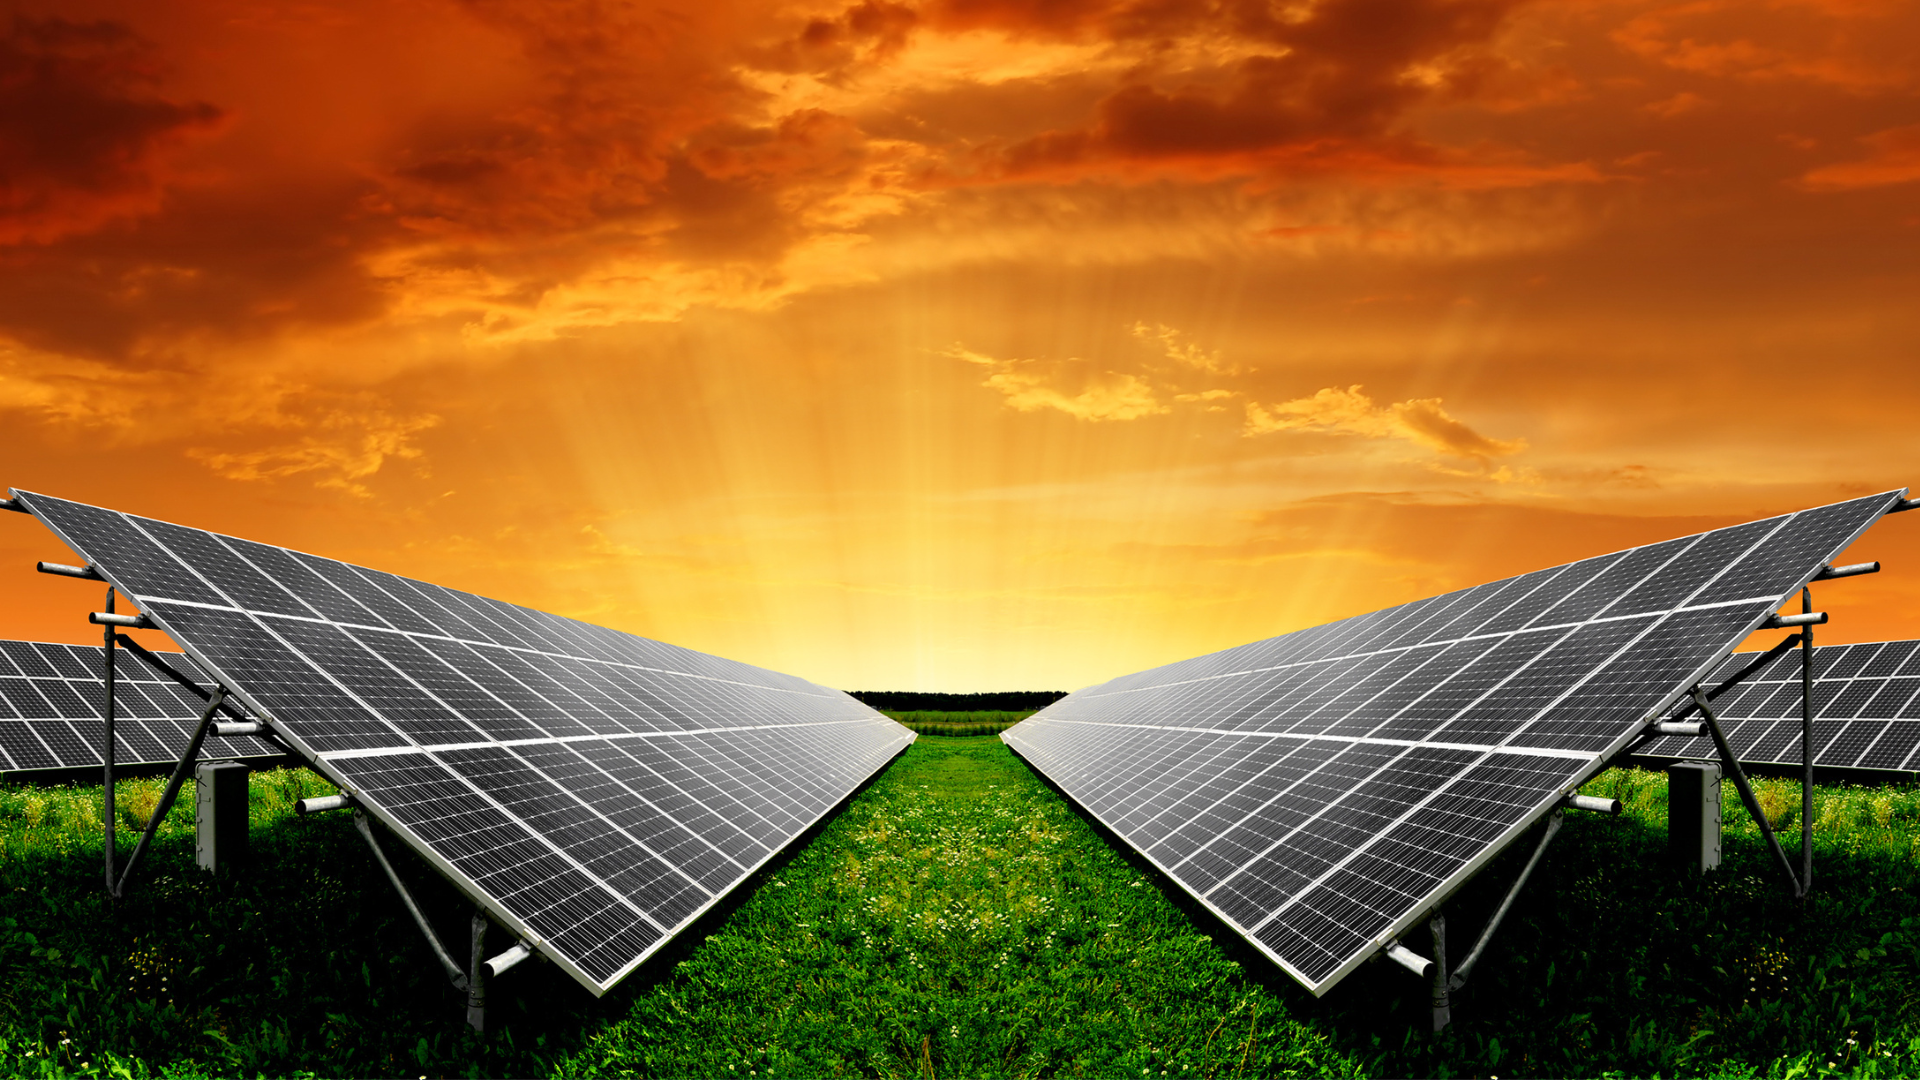

### ATTRIBUTE INFORMATION

https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Problem Statement</h1>
    
</div>


In this case study we need to predict the price actual depending upon different parameters, such as generation from different sources.

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">About Dataset</h1>
    
</div>


This dataset contains 4 years of electrical consumption, generation and pricing data for Spain. Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España.

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Importing Libraries</h1>
    
</div>

In [1]:
import pandas as pd
import numpy as np
import klib as k
import warnings 
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
import IPython

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Loading Dataset</h1>
    
</div>


In [2]:
df = pd.read_csv('./energy_dataset.csv')
df

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Understanding The Data Features</h1>
    
</div>


1)generation biomass-Power generated by biomass

2)generation fossil brown coal/lignite-Power generated by fossil brown coal/lignite

3)generation fossil gas-power generated by fossil gas

4)generation fossil hard coal-power generated by fossil hard coal

5)generation fossil oil-power generated by fossil oil

6)generation hydro pumped storage consumption-power generated by pumped storage consumption(This is used as an emergency power resource)

7)generation hydro run-of-river and poundage-power generated by hydro run

8)generation hydro water reservoir-power generated by water reservior

9)generation nuclear-power generated by nuclear energy

10)generation other-power generated by other sources

11)generation other renewable-power generated by other renewable energies other than mentioned in the dataset

12)generation solar-power generated by solar energy

13)generation waste-power generated by waste

14)generation wind onshore-power generated by wind onshore

15)total load actual-This is the dependent varibale.It tell us about the total load consumption.

16)temp- Temperature of the area when load consumption was recorded

17)pressure-Pressure of the area when load consumption was recorded

18)humidity-Humidity of the area when load consumption was recorded.

19)wind_speed-Wind speed of the area when load consumption was recorded.

20)wind_deg-Wind direction of the area when load consumption was recorded.

21)rain_1h-It tells us about the intensity of rainfall.

22)snow_3h-It is divided into 4 values and tells us about the intensity of snowfall.

23)weather_id-It gives us 23 values of different weather condition.

24)weather_main-Even this column tells us about the weather condition i.e whether it was clear or cloudy or it was raining when the load was recorded.

25)weather_description-It tells us about the overcast,whether it was raining or sunny.

26)time-It gives us the date and time when load was recorded

### Data Exploration

In [3]:
df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [4]:
df.shape

(35064, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [7]:
df.isnull().mean()*100

time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

### Dropping unwanted columns 

In [8]:
df.drop(columns=["generation hydro pumped storage aggregated","forecast wind offshore eday ahead","generation marine","generation geothermal","generation fossil oil shale","generation fossil peat","generation wind offshore","forecast wind offshore eday ahead","generation fossil coal-derived gas"],axis=1, inplace=True)
df.head(2)

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   

   generation hydro water reservoir  generation nuclear  ...  \
0                            1899.0              7096.0  ...   
1                            1658.0              7096.0  ...   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   

   generation wind onshore  forecast solar day ahead  \
0                   6378.0                      17.0   
1                   5890.0                      16.0   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   

   price day ahead  price actual  
0             50.1         65.41  
1             48.1         64.92  

[2 rows x 21 columns]

In [9]:
df.isnull().mean()*100

time                                           0.000000
generation biomass                             0.054187
generation fossil brown coal/lignite           0.051335
generation fossil gas                          0.051335
generation fossil hard coal                    0.051335
generation fossil oil                          0.054187
generation hydro pumped storage consumption    0.054187
generation hydro run-of-river and poundage     0.054187
generation hydro water reservoir               0.051335
generation nuclear                             0.048483
generation other                               0.051335
generation other renewable                     0.051335
generation solar                               0.051335
generation waste                               0.054187
generation wind onshore                        0.051335
forecast solar day ahead                       0.000000
forecast wind onshore day ahead                0.000000
total load forecast                            0

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().mean()*100

time                                           0.0
generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind onshore                        0.0
forecast solar day ahead                       0.0
forecast wind onshore day ahead                0.0
total load forecast                            0.0
total load actual                              0.0
price day ahead                

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35018 non-null  object 
 1   generation biomass                           35018 non-null  float64
 2   generation fossil brown coal/lignite         35018 non-null  float64
 3   generation fossil gas                        35018 non-null  float64
 4   generation fossil hard coal                  35018 non-null  float64
 5   generation fossil oil                        35018 non-null  float64
 6   generation hydro pumped storage consumption  35018 non-null  float64
 7   generation hydro run-of-river and poundage   35018 non-null  float64
 8   generation hydro water reservoir             35018 non-null  float64
 9   generation nuclear                           35018 non-null  float64
 10

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">EDA</h1>
    
</div>


### Histplot

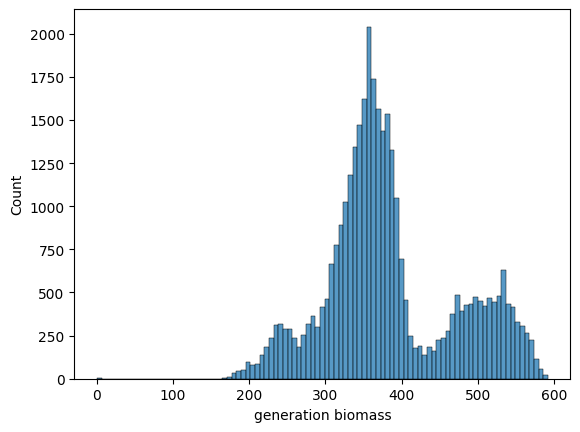

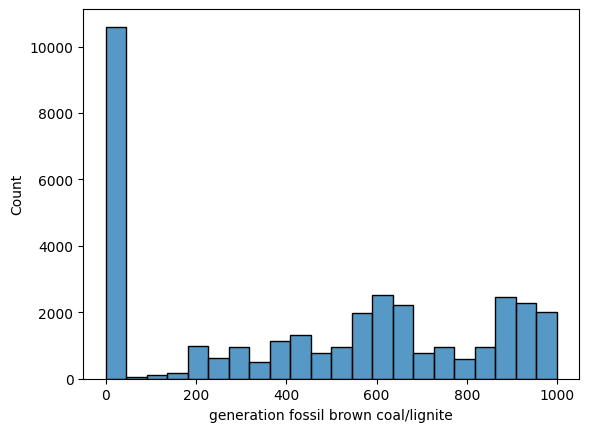

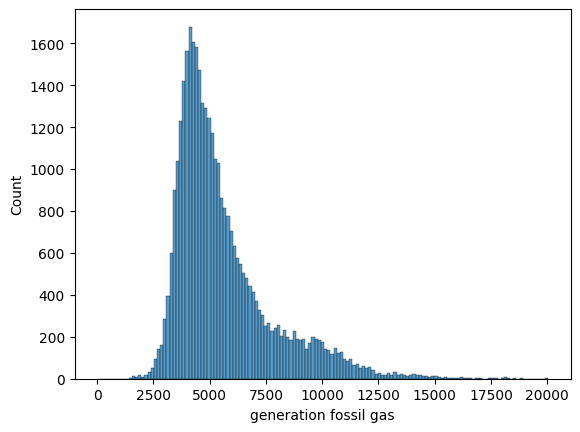

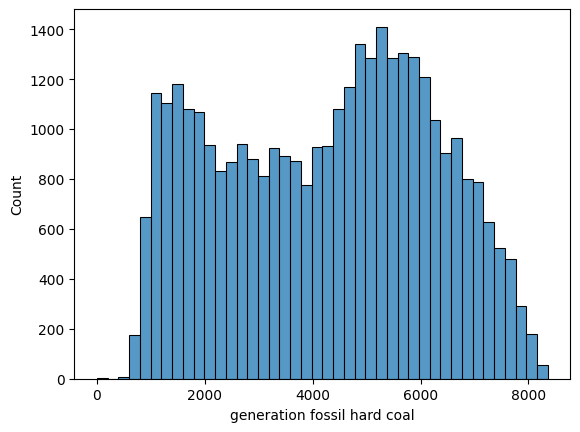

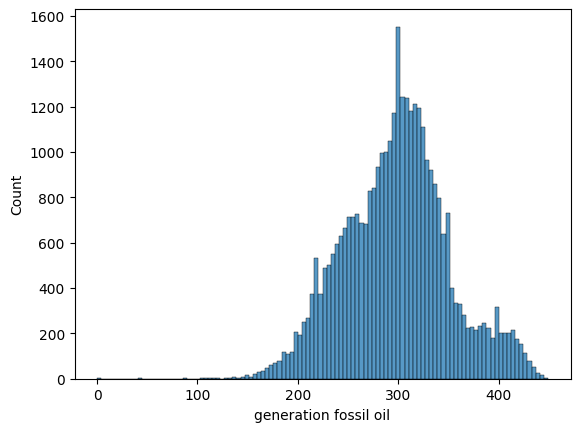

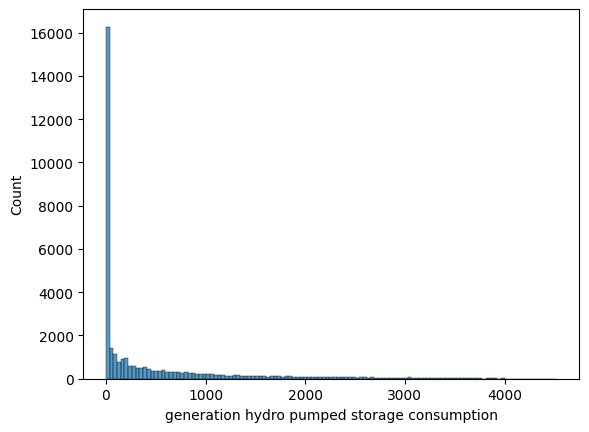

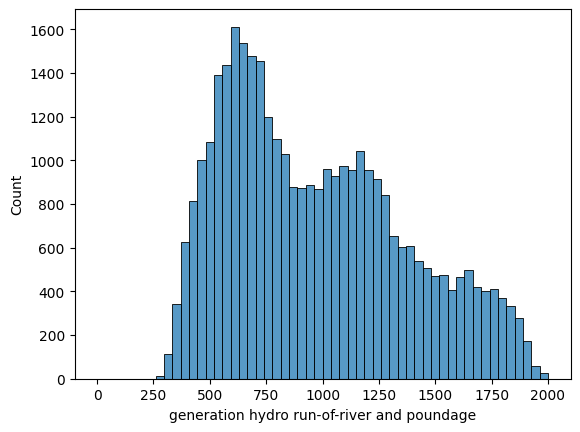

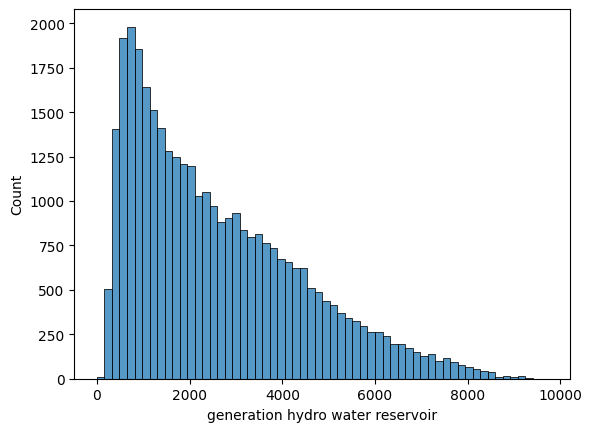

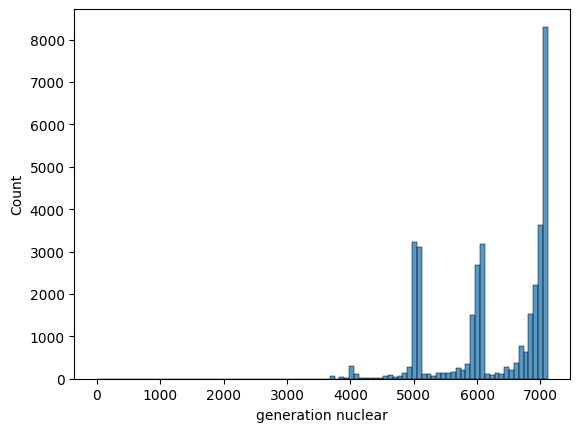

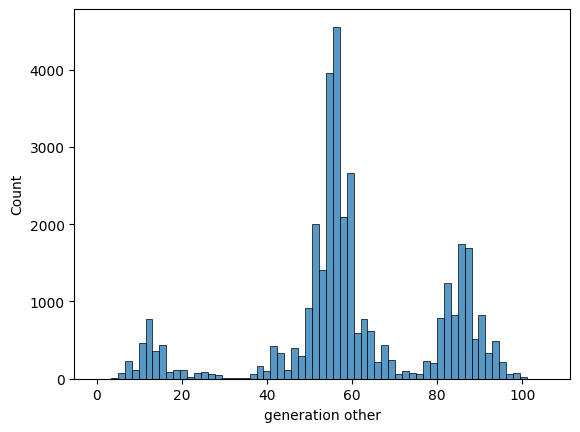

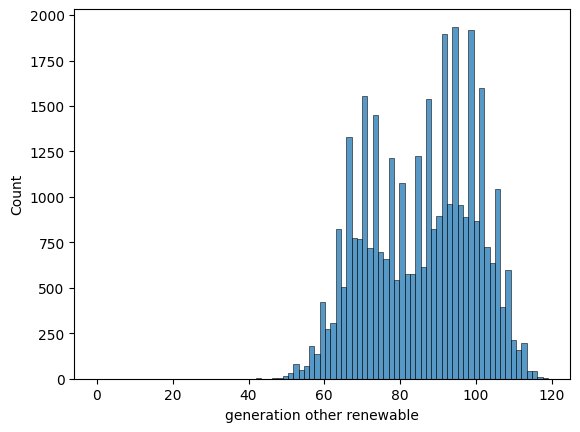

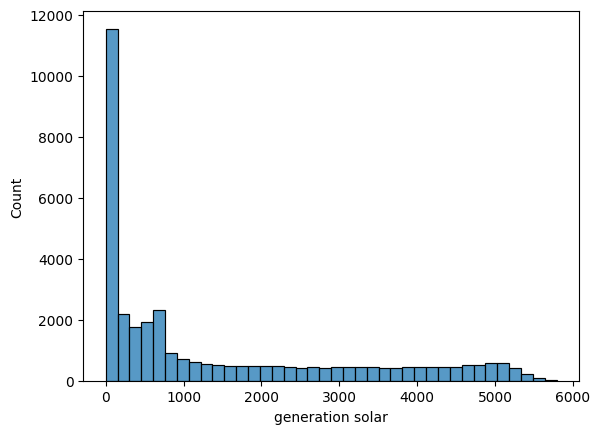

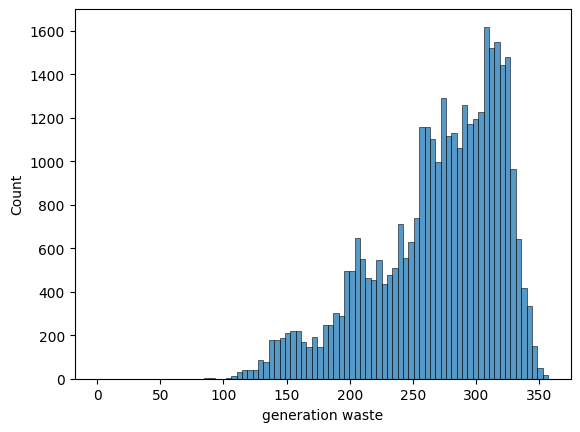

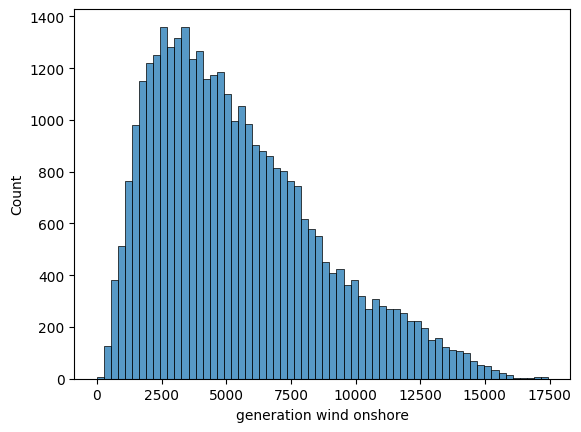

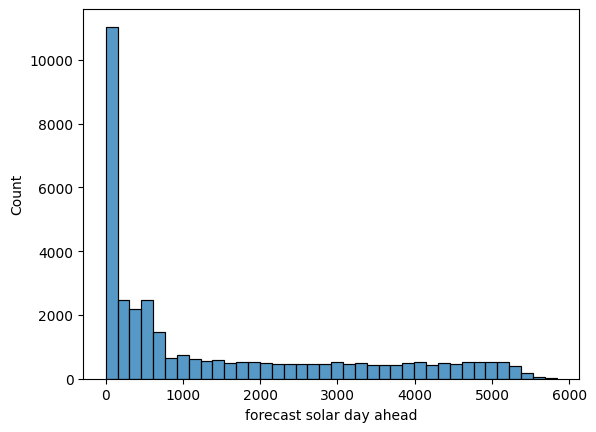

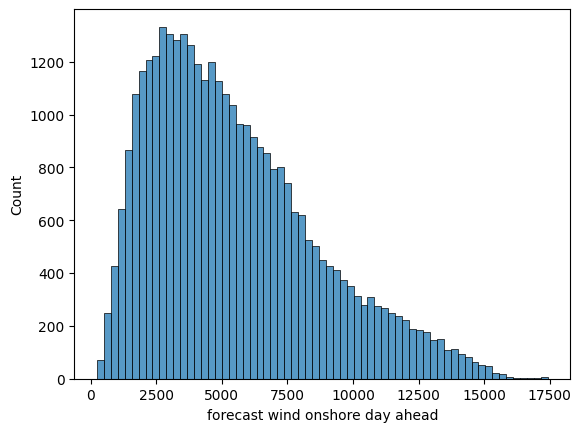

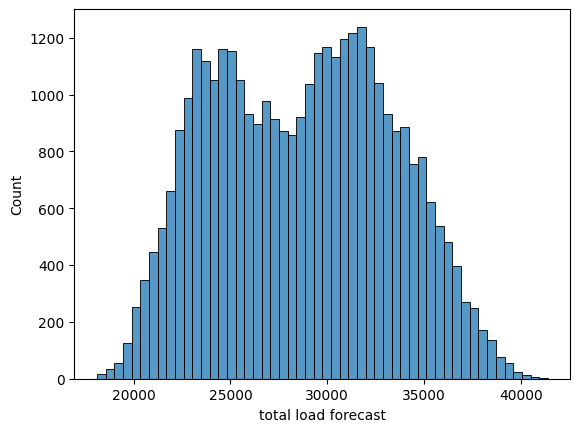

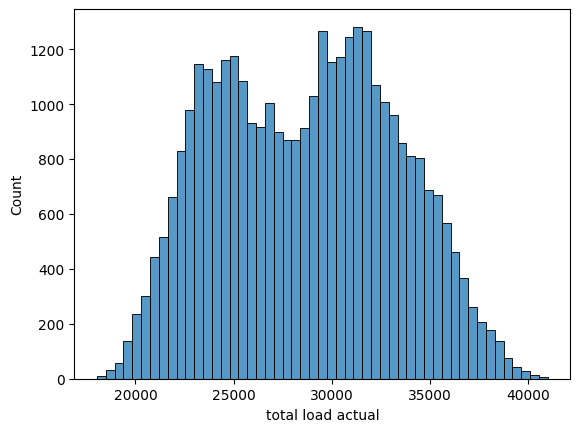

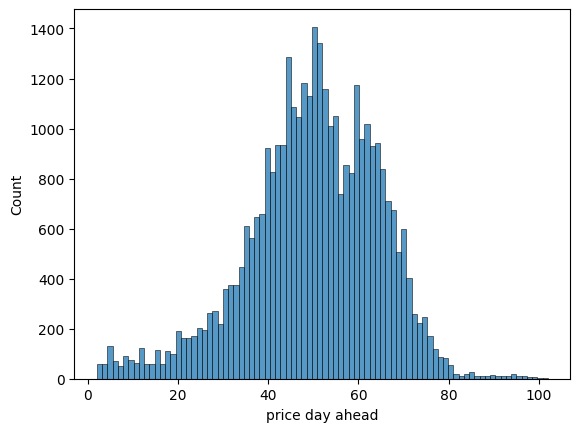

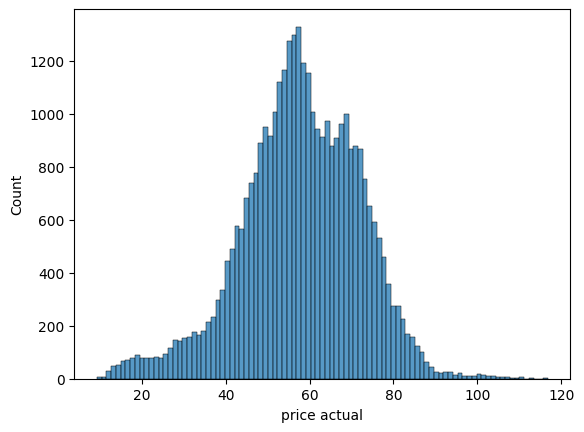

In [16]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show()

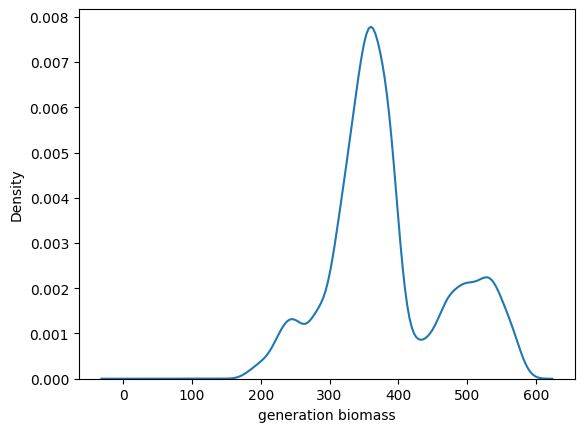

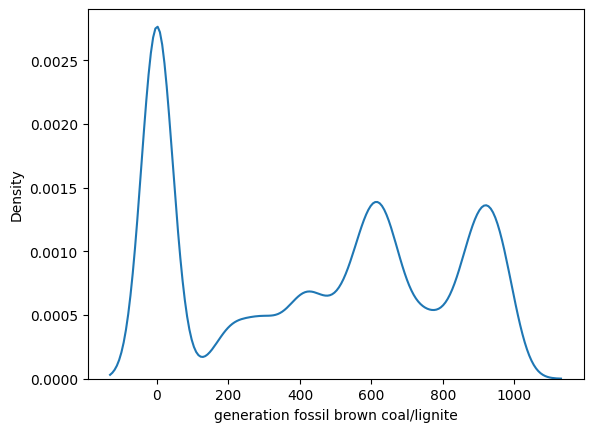

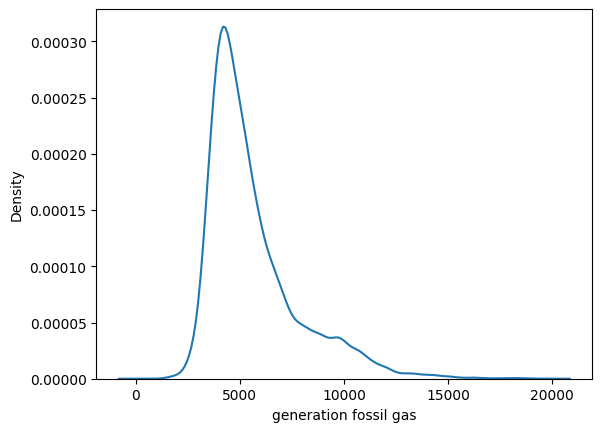

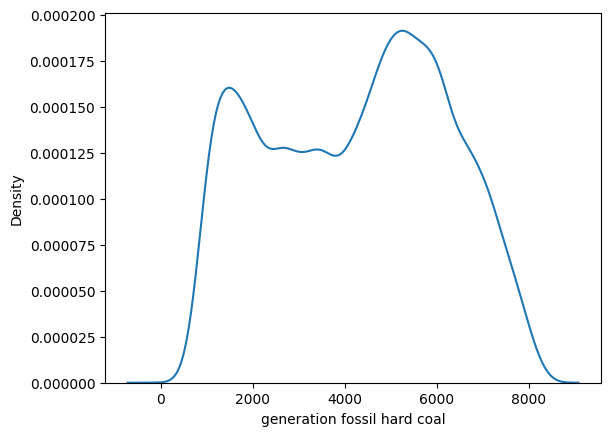

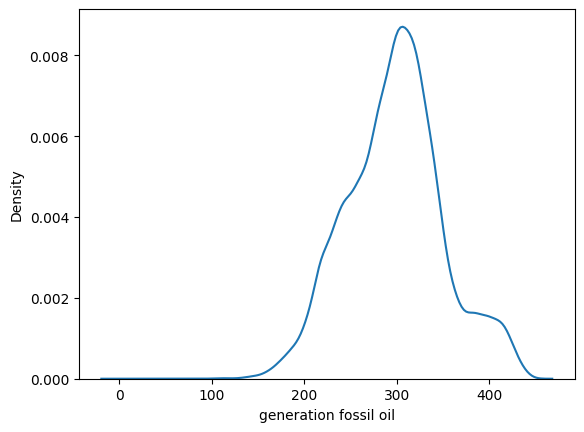

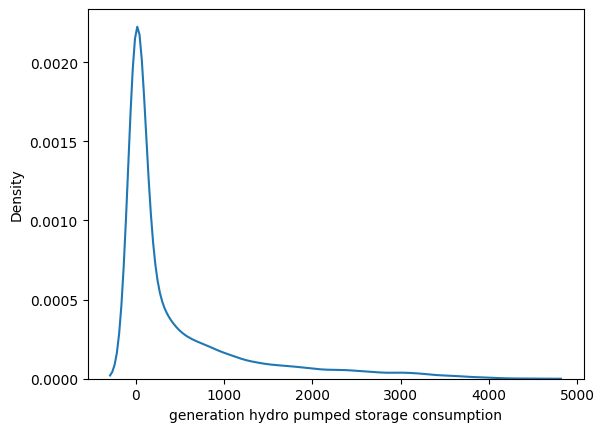

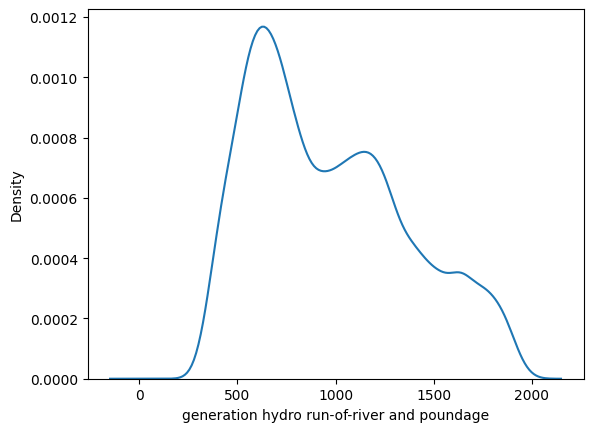

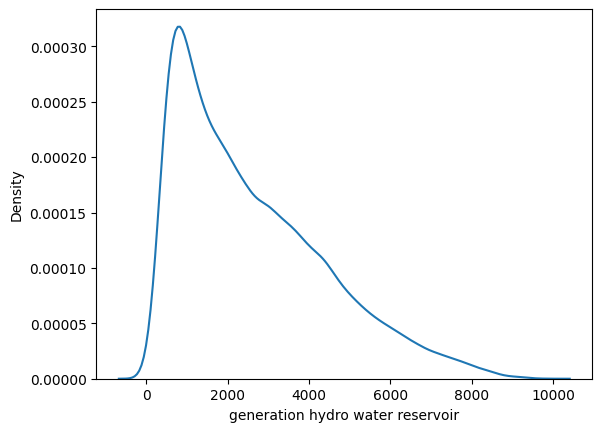

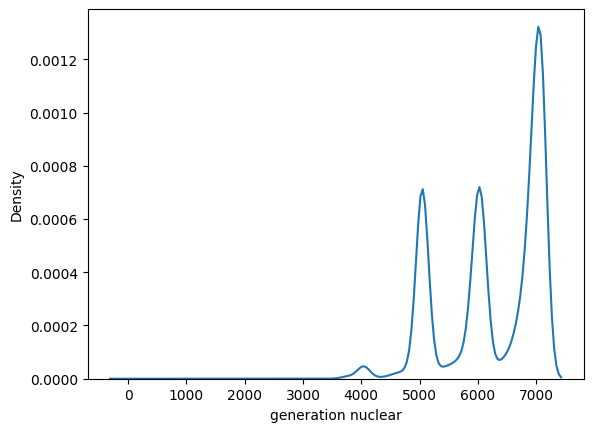

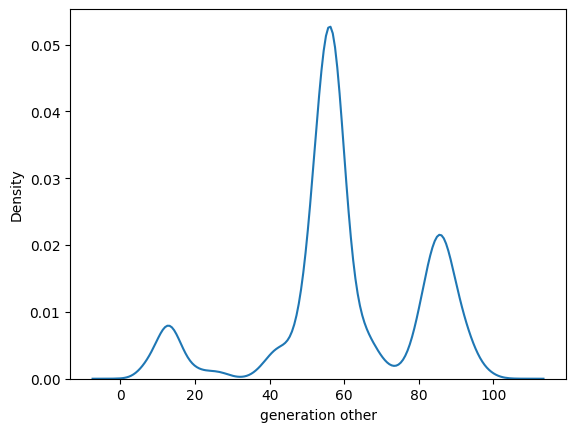

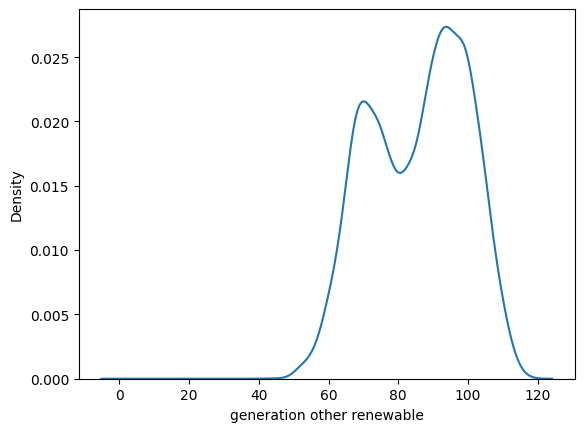

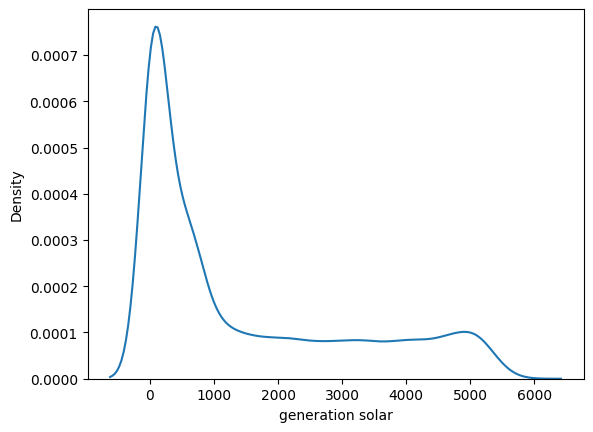

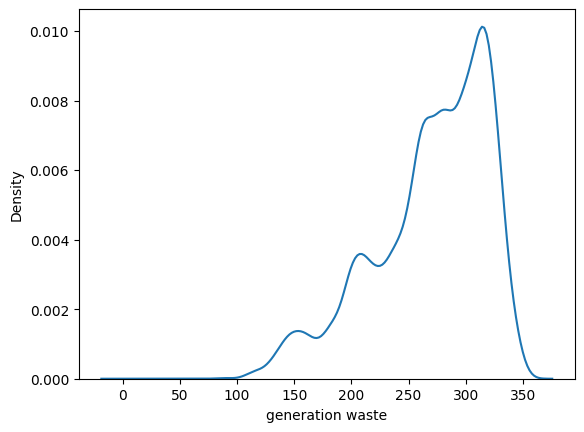

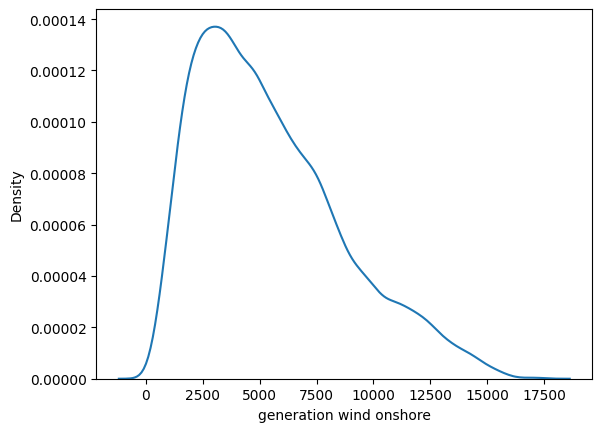

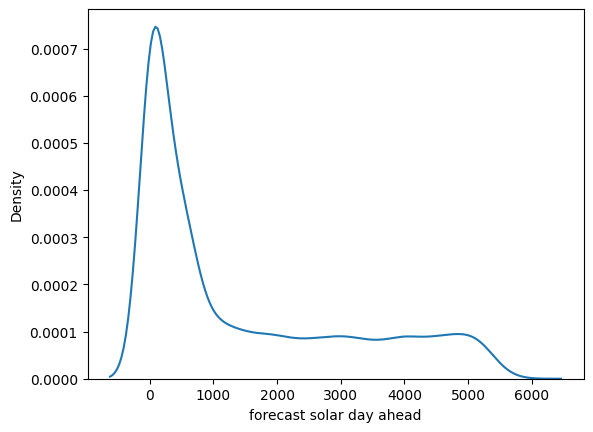

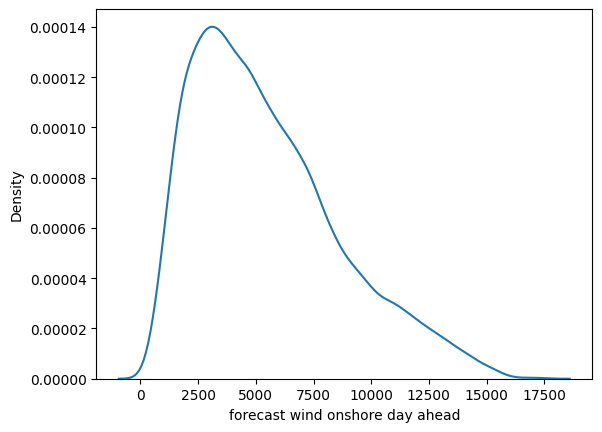

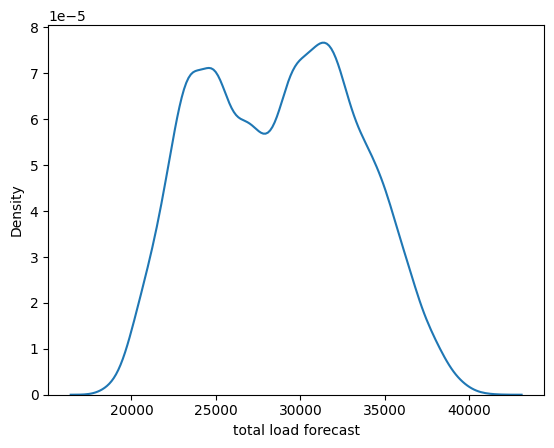

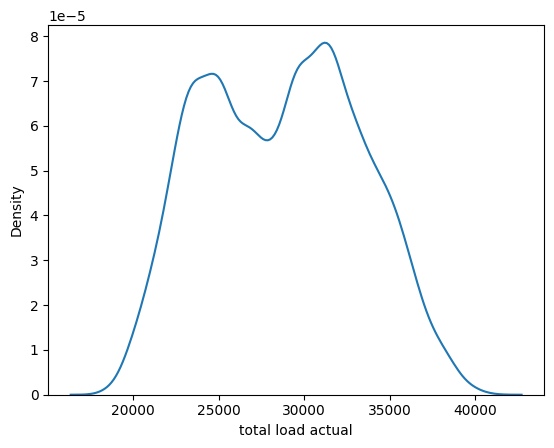

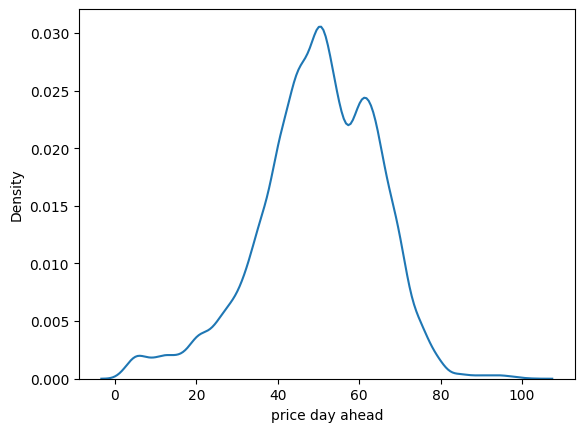

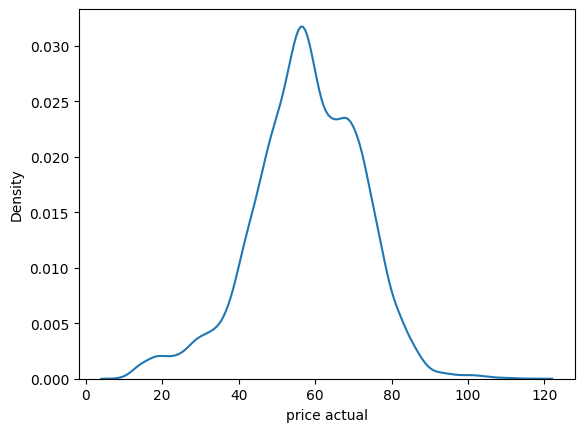

In [17]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show()

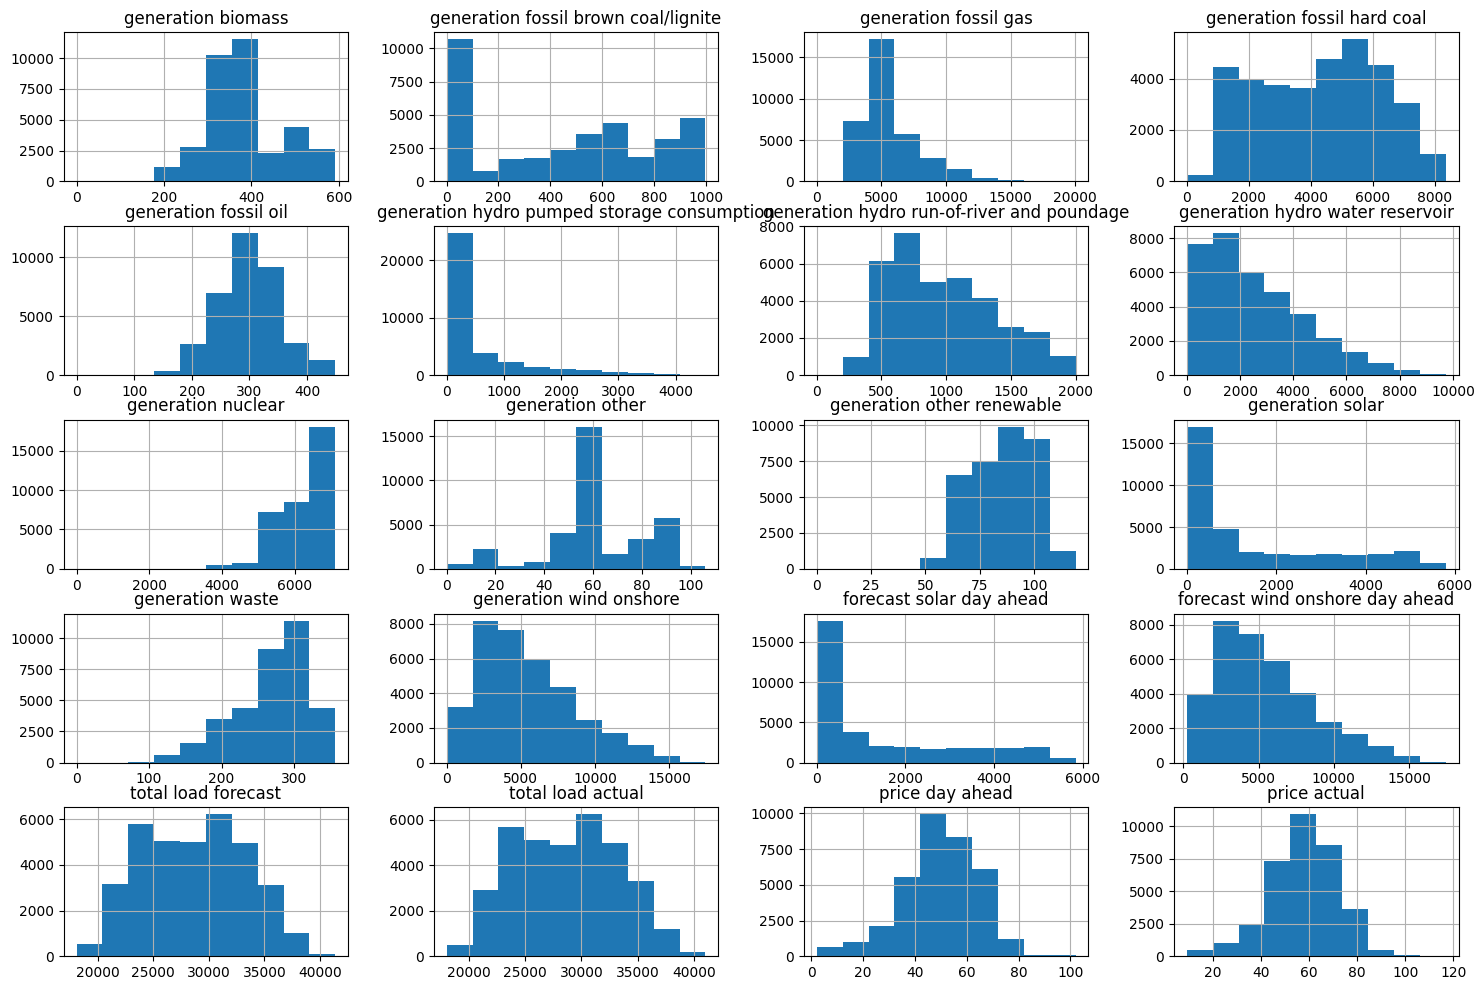

In [18]:
df.hist(figsize=(18,12));

### Checking outliers

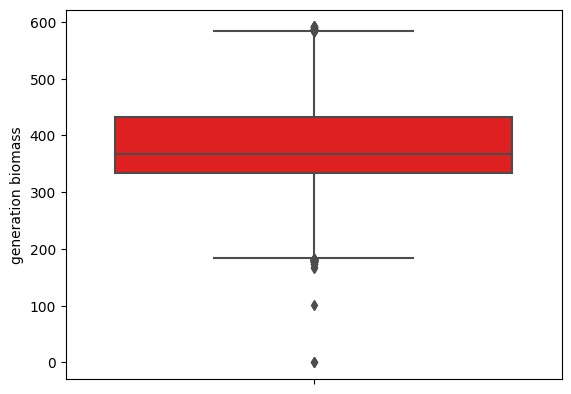

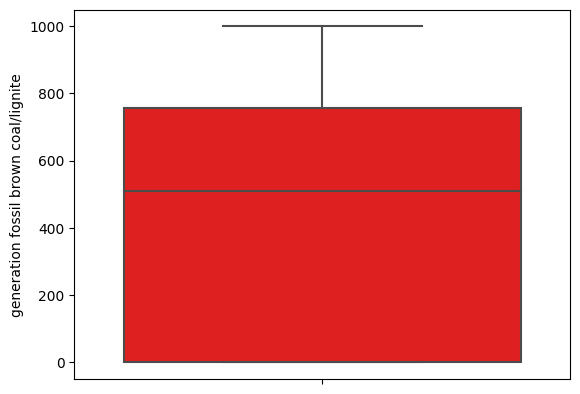

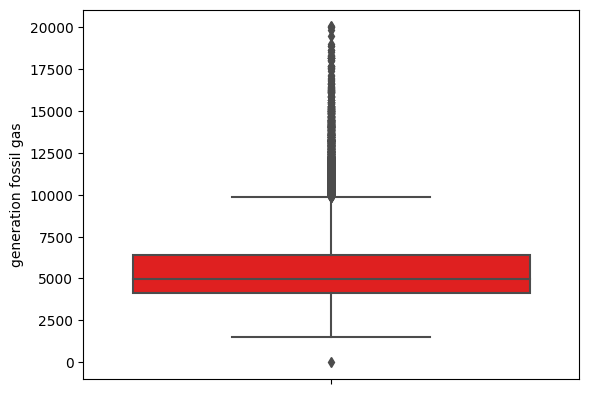

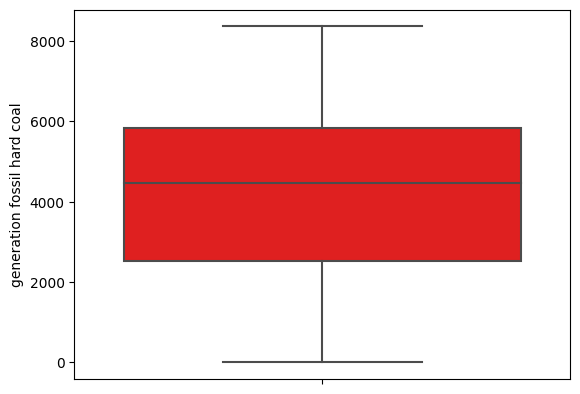

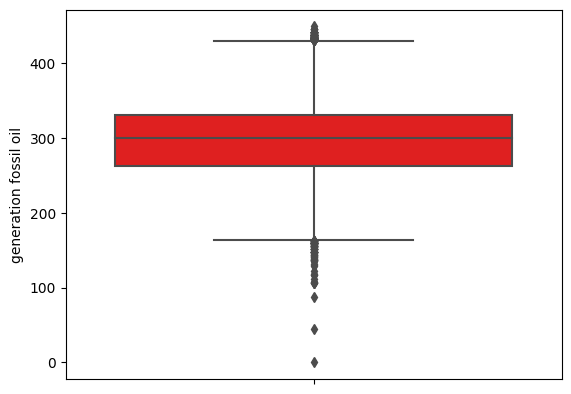

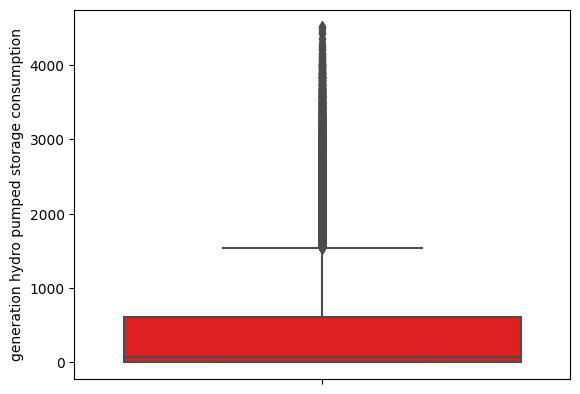

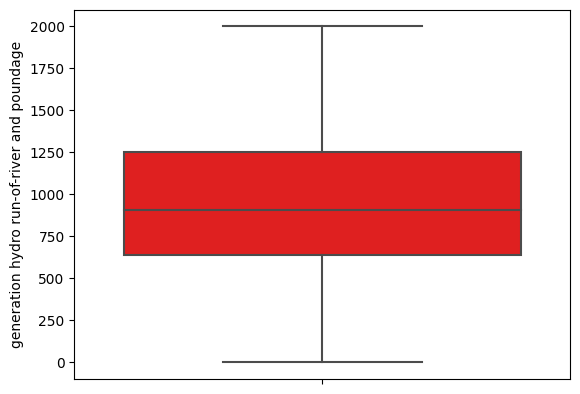

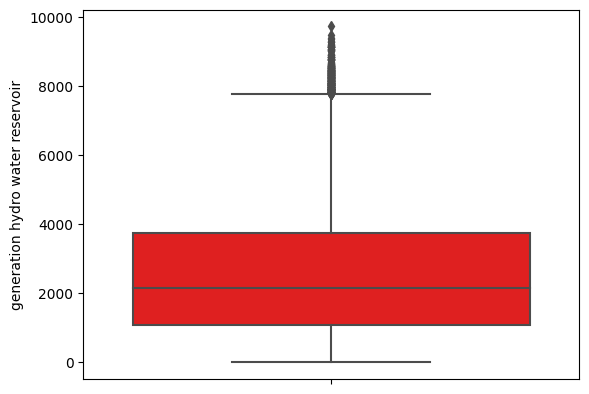

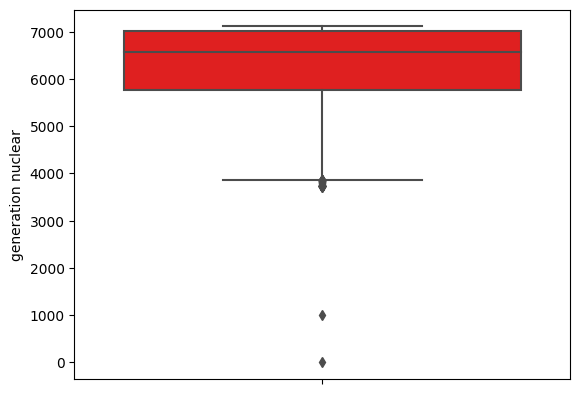

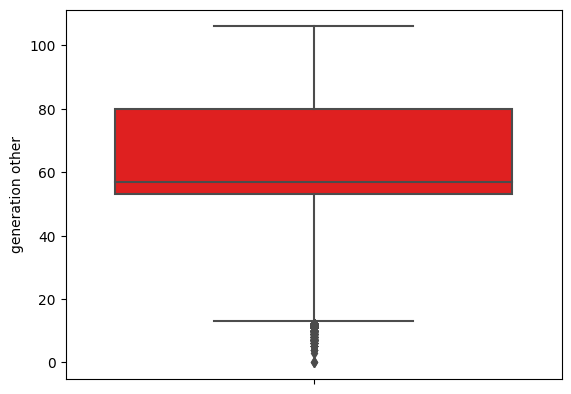

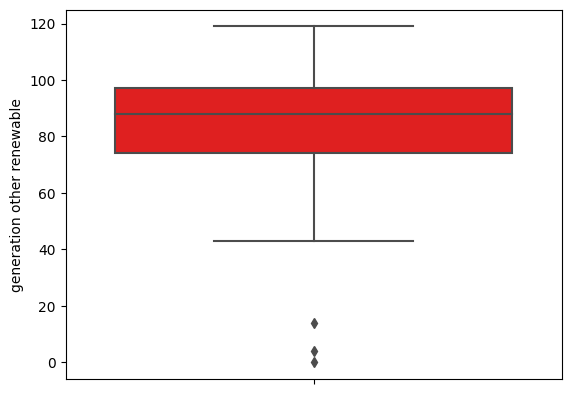

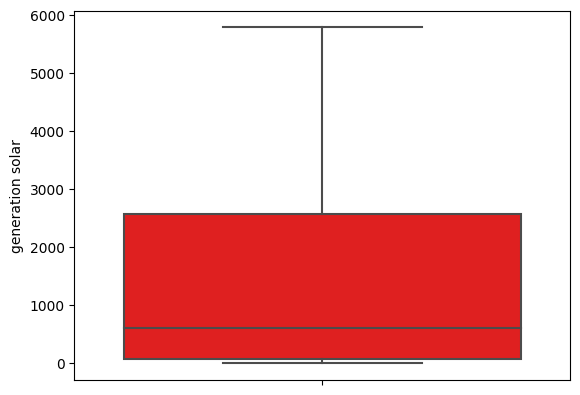

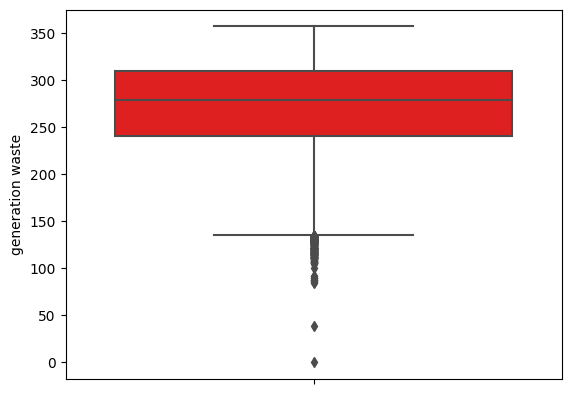

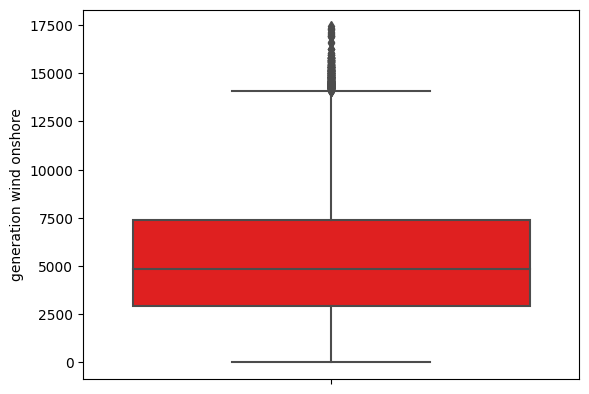

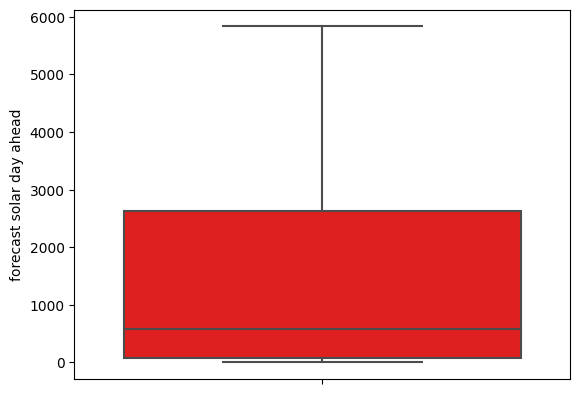

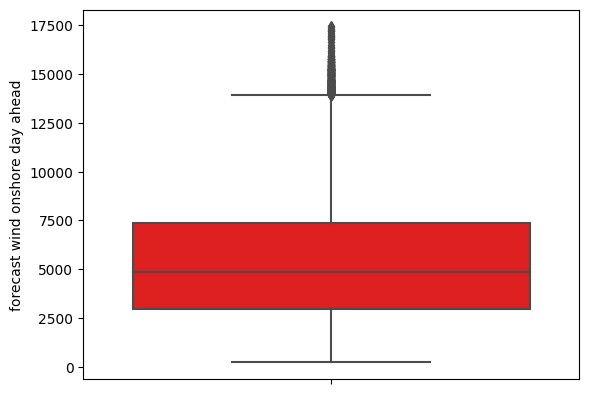

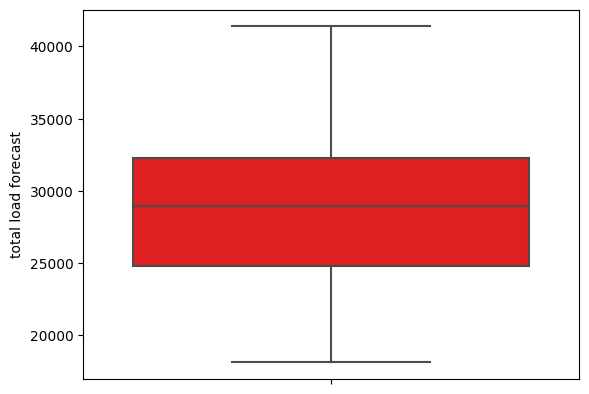

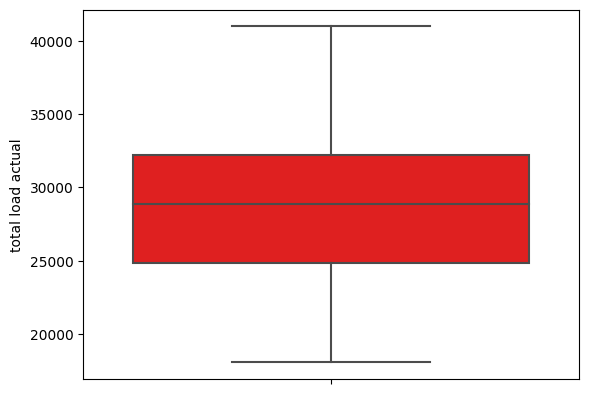

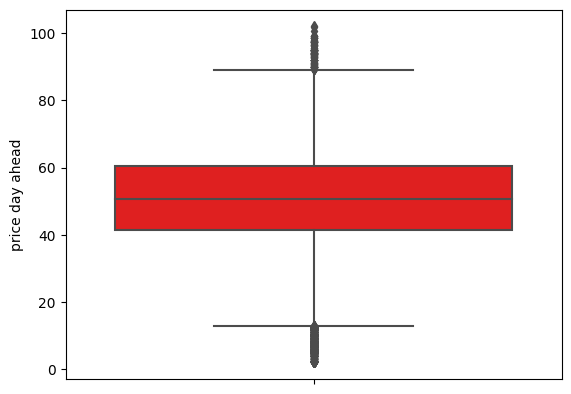

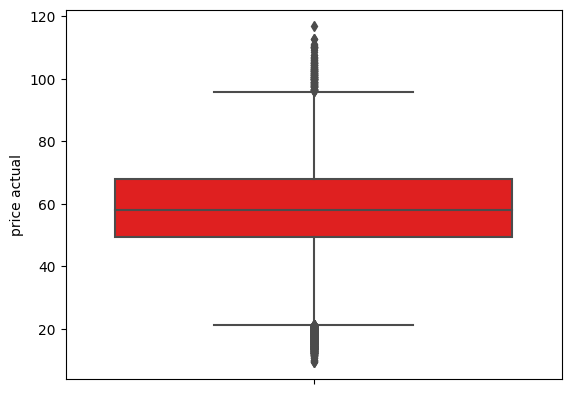

In [19]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color='red')
        plt.show()

### Outlier Treatment

In [20]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [21]:
for i in df.columns:
    if df[i].dtype !="object":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL), np.nan, df[i])

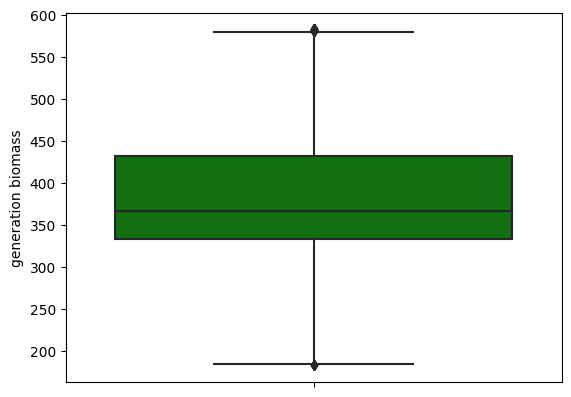

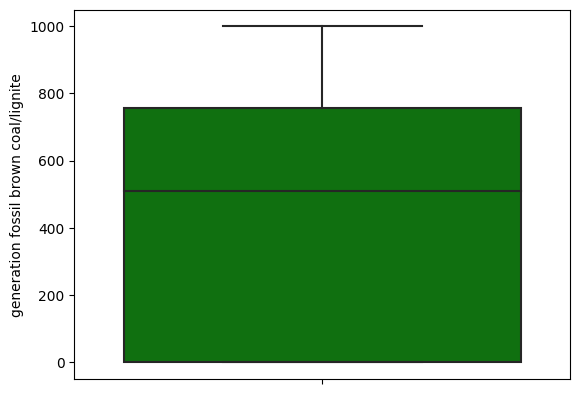

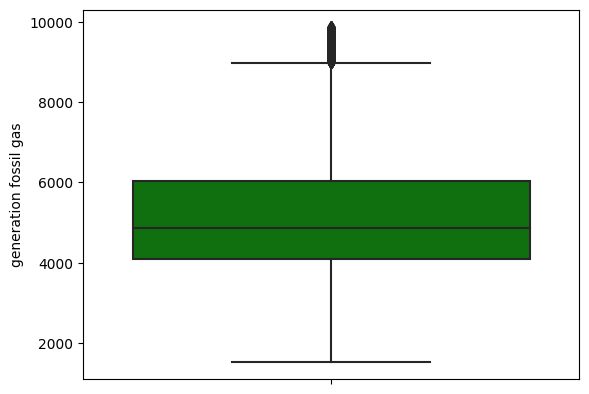

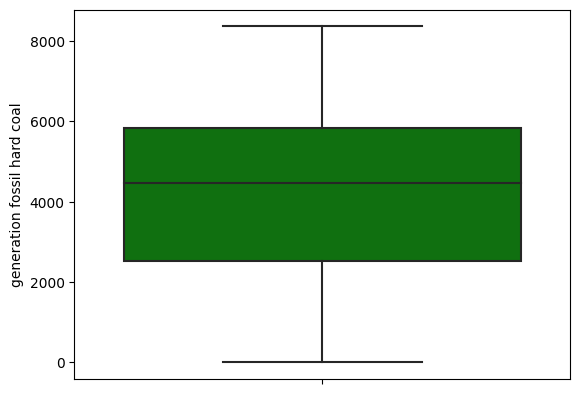

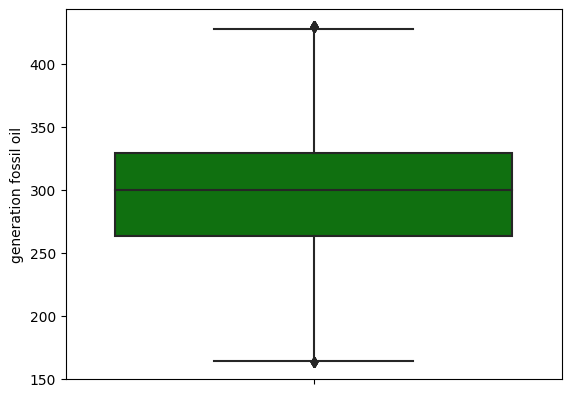

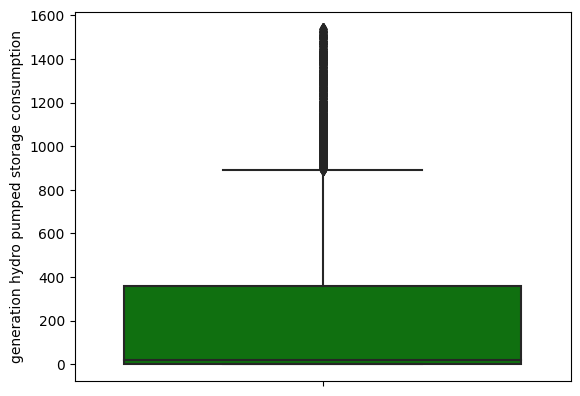

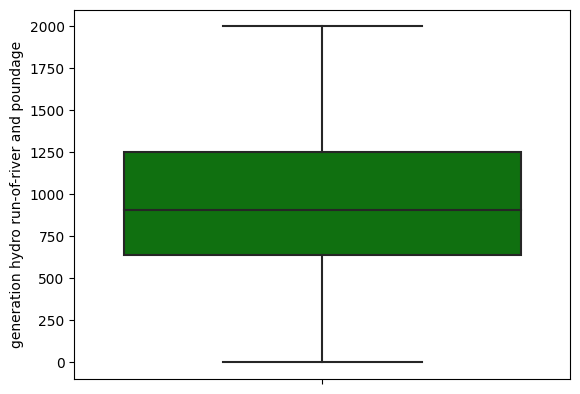

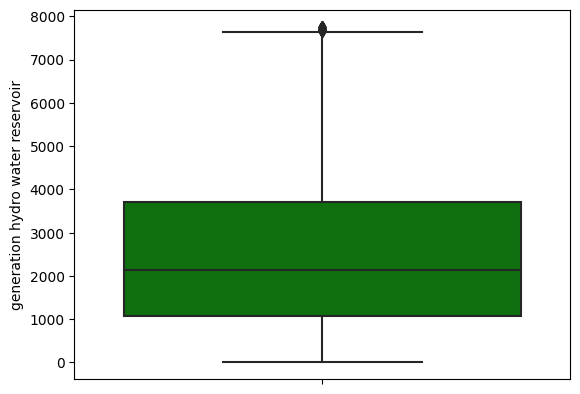

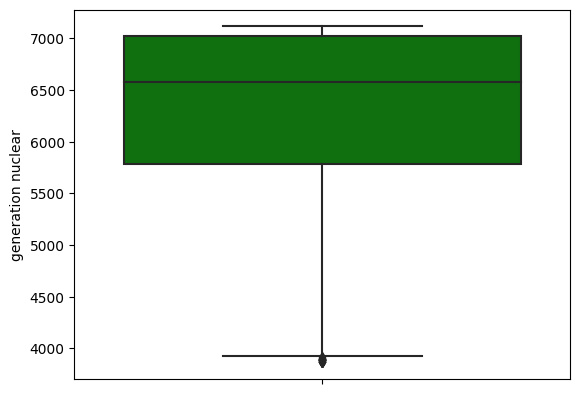

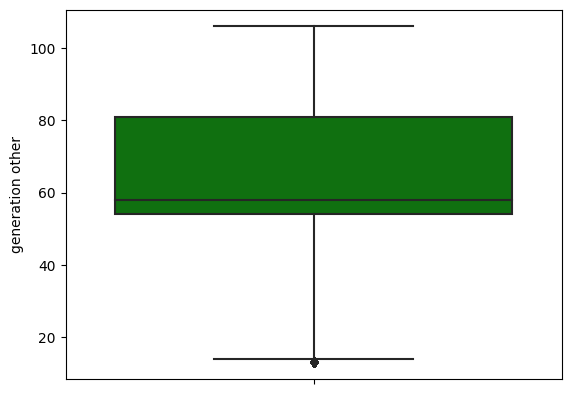

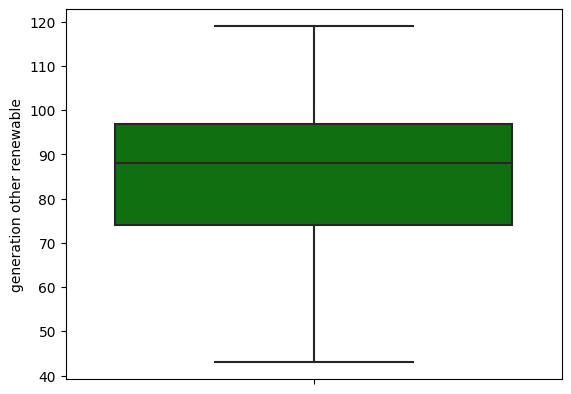

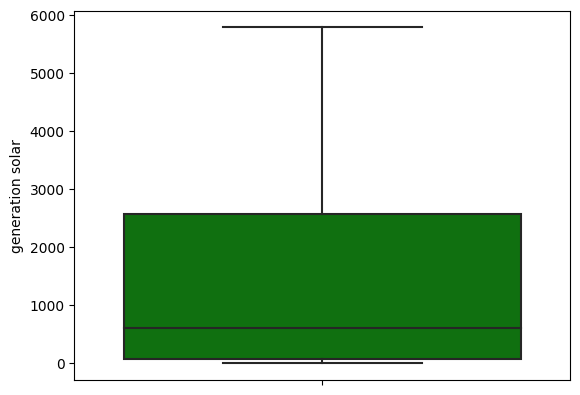

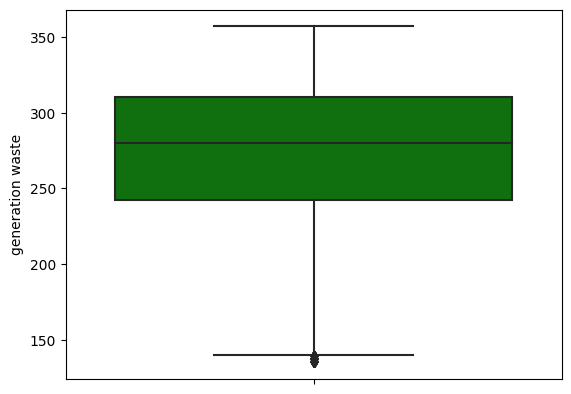

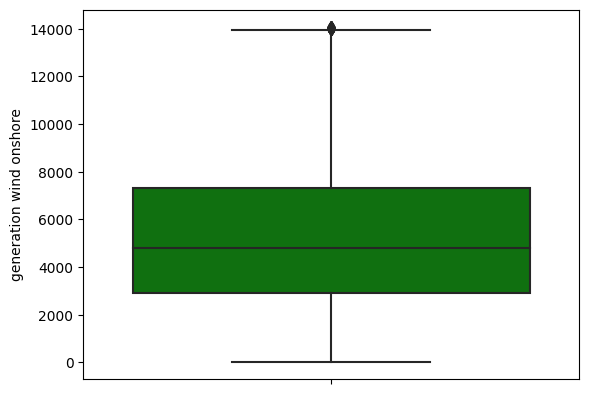

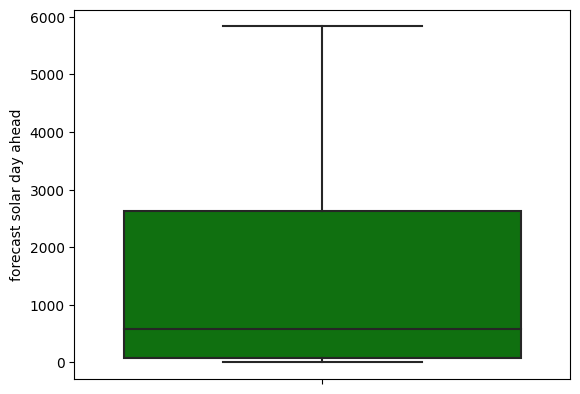

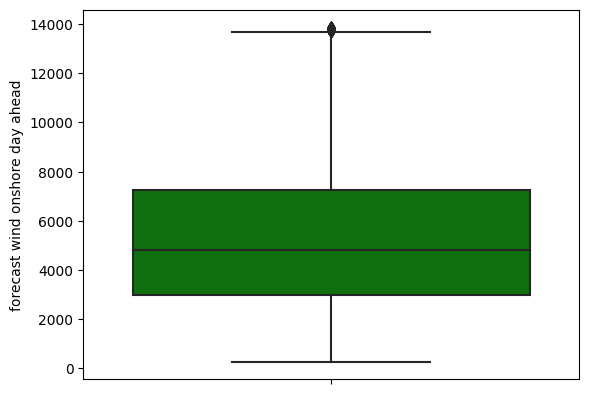

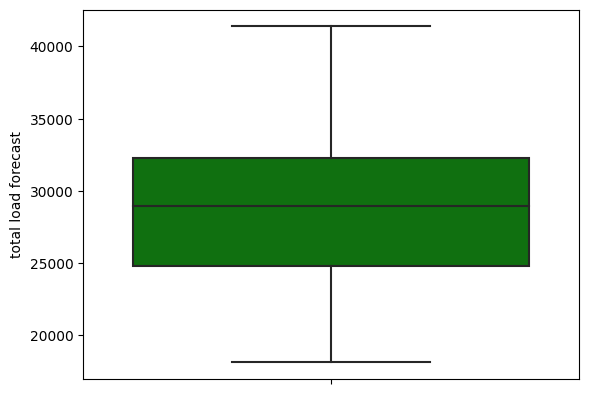

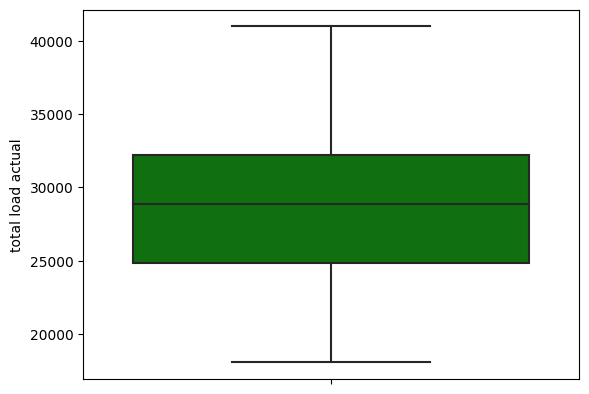

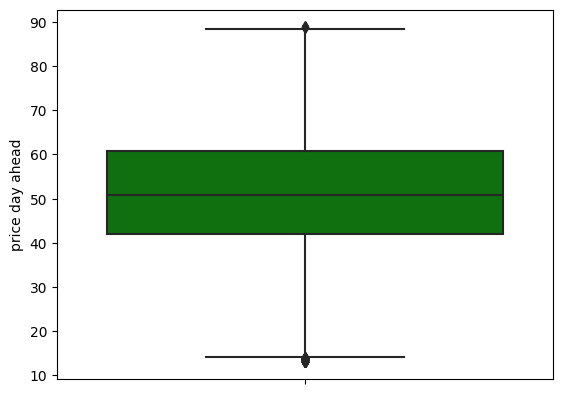

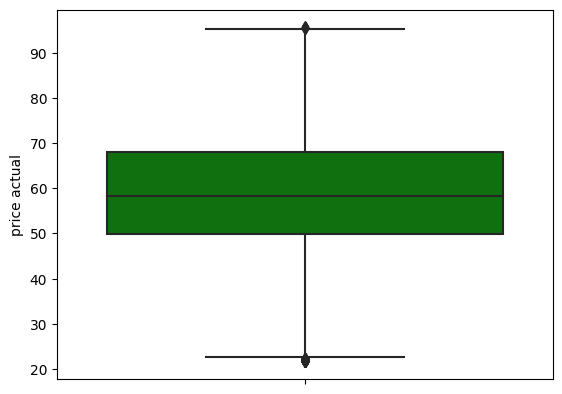

In [22]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [23]:
df.dropna(inplace=True)
df.head(2)

time  generation biomass  \
11  2015-01-01 11:00:00+01:00               421.0   
12  2015-01-01 12:00:00+01:00               428.0   

    generation fossil brown coal/lignite  generation fossil gas  \
11                                 226.0                 3931.0   
12                                 303.0                 3784.0   

    generation fossil hard coal  generation fossil oil  \
11                       3845.0                  166.0   
12                       4220.0                  167.0   

    generation hydro pumped storage consumption  \
11                                       1183.0   
12                                        972.0   

    generation hydro run-of-river and poundage  \
11                                      1069.0   
12                                      1052.0   

    generation hydro water reservoir  generation nuclear  ...  \
11                            1516.0              7097.0  ...   
12                            1204.0              7097.0  ...   

    generation other renewable  generation solar  generation waste  \
11                        73.0            3197.0             206.0   
12                        75.0            3885.0             209.0   

    generation wind onshore  forecast solar day ahead  \
11                   2771.0                    2990.0   
12                   2906.0                    3842.0   

    forecast wind onshore day ahead  total load forecast  total load actual  \
11                           2450.0              23720.0            23547.0   
12                           2819.0              24180.0            24133.0   

    price day ahead  price actual  
11            45.14         59.86  
12            45.14         60.12  

[2 rows x 21 columns]

<AxesSubplot: >

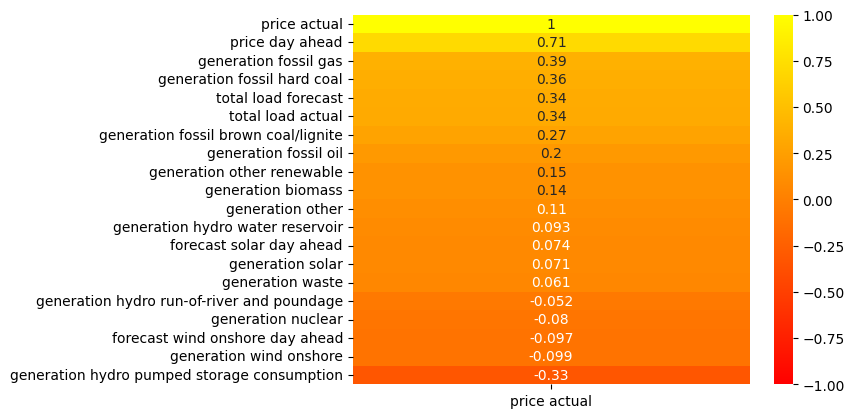

In [24]:
sns.heatmap(df.corr()[["price actual"]].sort_values(by="price actual", ascending=False), vmax=1, vmin=-1, annot=True, cmap="autumn")

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">FEATURE ENGINEERING</h1>
    
</div>

In [25]:
x=df[['generation fossil brown coal/lignite','price day ahead','total load actual','total load forecast','generation fossil hard coal','generation fossil gas']].values
y=df[['price actual']].values

In [26]:
sc= StandardScaler()
x = sc.fit_transform(x)

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL SELECTION AND TRAINING</h1>
    
</div>


In [27]:
# importing train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL BUILDING</h1>
    
</div>

In [28]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [29]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  54.206162886611196
training_score:  51.628607670014325
testing_score:  54.206162886611196
mae:  5.408790010930145
mse:  66.56480066929056
rmse_test:  8.15872543166459
****************************************************************************************************
model trained with Ridge
r2score:  54.20635897406796
training_score:  51.62860602696504
testing_score:  54.20635897406796
mae:  5.408896685948266
mse:  66.56451564136333
rmse_test:  8.15870796397097
****************************************************************************************************
model trained with LinearSVR
r2score:  51.57256351095312
training_score:  47.93264753072257
testing_score:  51.57256351095312
mae:  4.965204928300992
mse:  70.39293625551323
rmse_test:  8.390049836294969
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  29.995351905849244
training_sc

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Model Training</h1>
    
</div>


### Random Forest Regressor is having the best perfomance. Lets try to increase its accuray by Hyper parameter tuning

In [30]:
rfr = RandomForestRegressor(random_state=0)


### Create the parameter grid based on the results of random search

In [31]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,25,50],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4,6,8,10],
    'n_estimators': [50,100,150]
}

In [32]:
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [33]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 25, 50],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150]})

In [34]:
grid_search.best_score_

0.6117103240275413

In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 150}

In [36]:
RFR = RandomForestRegressor(n_estimators=150, bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=4, random_state=0)

In [37]:
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=150, random_state=0)

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Hyperparameter Tuning</h1>
    
</div>


### Metrics after Hyperparameter tuning

In [38]:
training_score = RFR.score(x_train, y_train)*100
testing_score = RFR.score(x_test, y_test)*100
score = r2_score(y_test, RFR.predict(x_test))*100
mae = mean_absolute_error(y_test, RFR.predict(x_test))
mse = mean_squared_error(y_test, RFR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

r2score:  65.75951027770392
training_score:  86.56560646224436
testing_score:  65.75951027770392
mae:  4.656319253148109
mse:  49.77113770877161
rmse_test:  7.054866243152425


### We have improved the accuracy of the model. Lets proceed to prediction part.

In [39]:
y_pred = RFR.predict(x)

### Saving the prediction in a Dataframe

In [40]:
OUPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)

In [41]:
OUPUT.head()

ACTUAL  PREDICTED
0   59.86  56.346952
1   60.12  56.106469
2   62.05  57.882520
3   62.06  55.985582
4   61.18  56.950063

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Visualizing the Prediction</h1>
    
</div>


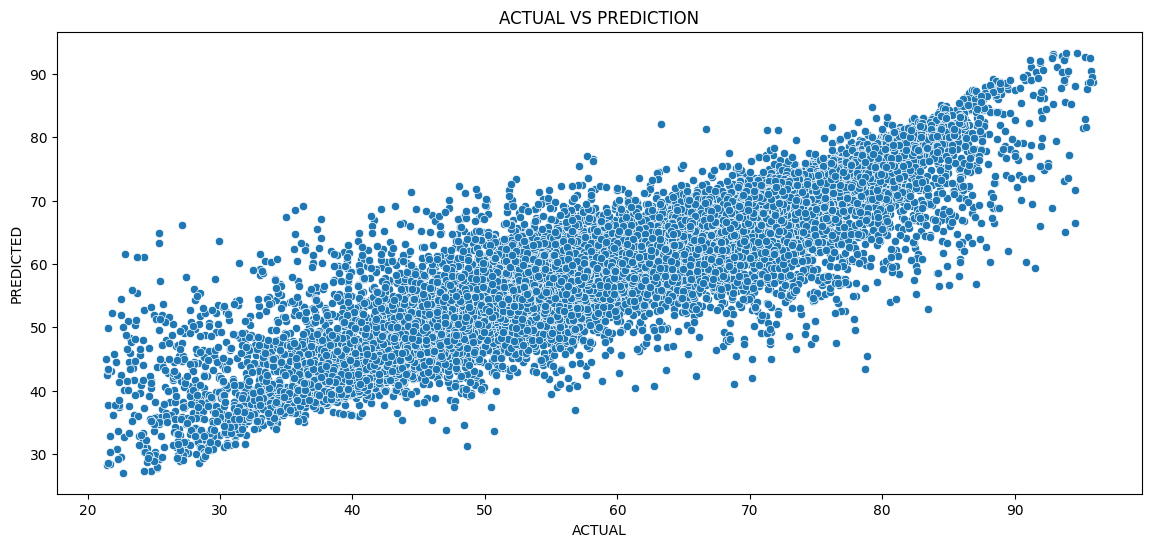

In [42]:
#Lineplot
plt.figure(figsize=(14,6))
sns.scatterplot(data = OUPUT, x="ACTUAL", y = "PREDICTED")
plt.title("ACTUAL VS PREDICTION")
plt.show();

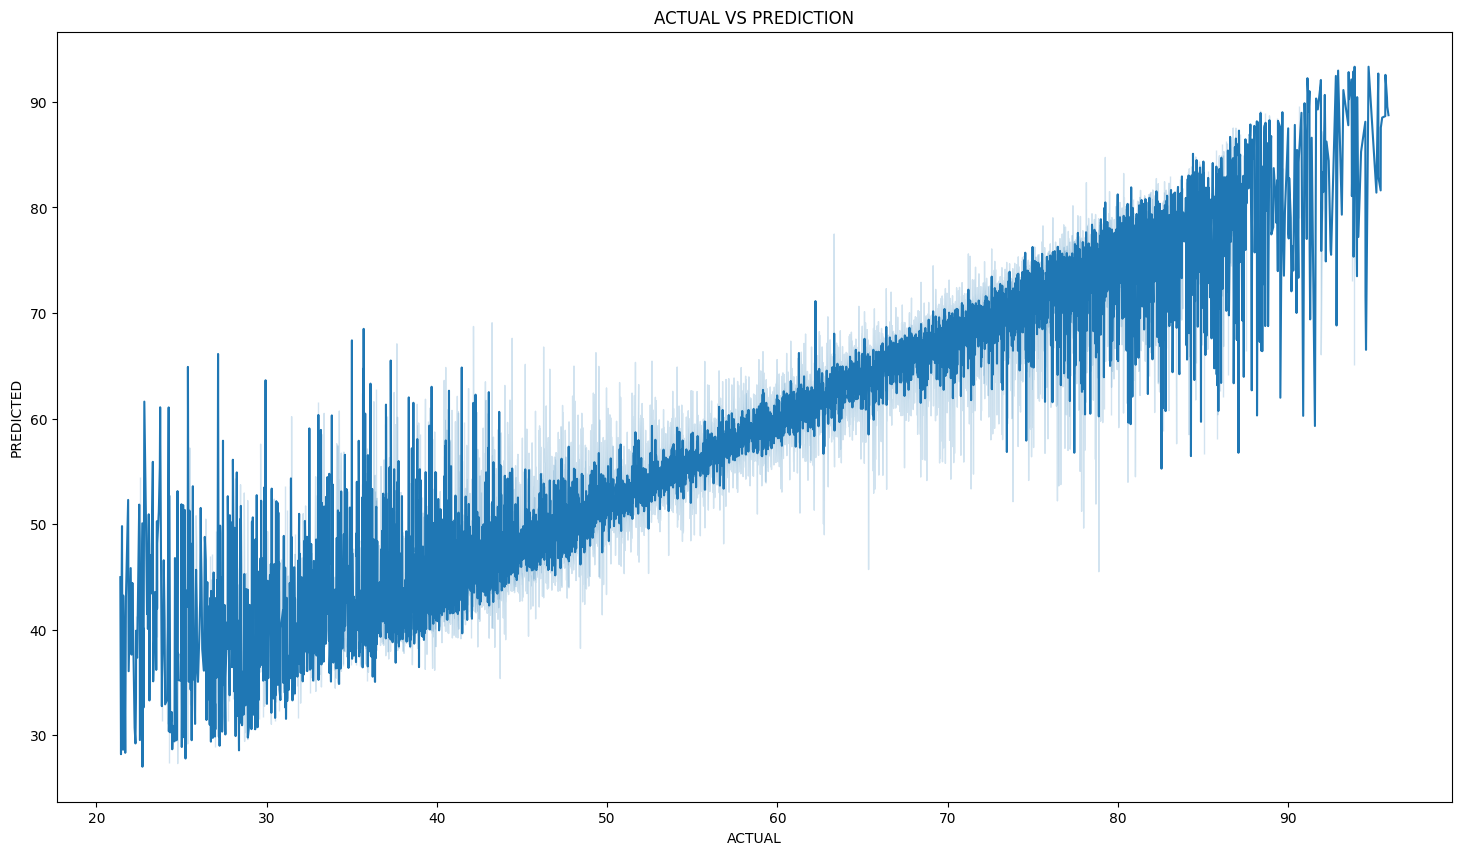

In [47]:
#Lineplot
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

<div style="background-color: orange; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">CONCLUSION</h1>
    
</div>

#### Using this real time dataset of consumption and generation of Spain, I have tried to predict the energy price depending upon different parameters, such as generation from different sources.

#### Using Randon Forest Regression Model I got an accuracy of 66.08%.

#### Further tried to improve the accuracy using Hyperparameter Tuning and got a grid search best score of 0.6117.

#### At the end using actual and predicted score scatterplot and lineplot are drawn.

#### By using this model future energy price can be predicted.
